# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#citipy = "citipy/worldcities.csv"
#citipy_data = pd.read_csv(citipy)

### Generate the Cities List by Using the `citipy` Library

In [164]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


In [165]:
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [166]:
# Set the API base URLu
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
 #Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | zaozersk
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | tshikapa
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | yuzhno-kurilsk
Processing Record 8 of Set 1 | santa marta
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | laramie
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | dawukou
Processing Record 17 of Set 1 | rio san juan
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | cala rajada
City not found. Skipping...
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | qianzhou


In [167]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [168]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-16.91,85,100,1.03,CA,1701183206
1,anadyr,64.7500,177.4833,-4.72,85,100,10.00,RU,1701183482
2,zaozersk,69.4005,32.4476,-1.89,82,94,7.00,RU,1701183482
3,tolanaro,-25.0319,46.9987,29.04,70,20,9.77,MG,1701183482
4,tshikapa,-6.4167,20.8000,22.87,93,100,1.93,CD,1701183483


In [169]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [170]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-16.91,85,100,1.03,CA,1701183206
1,anadyr,64.7500,177.4833,-4.72,85,100,10.00,RU,1701183482
2,zaozersk,69.4005,32.4476,-1.89,82,94,7.00,RU,1701183482
3,tolanaro,-25.0319,46.9987,29.04,70,20,9.77,MG,1701183482
4,tshikapa,-6.4167,20.8000,22.87,93,100,1.93,CD,1701183483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

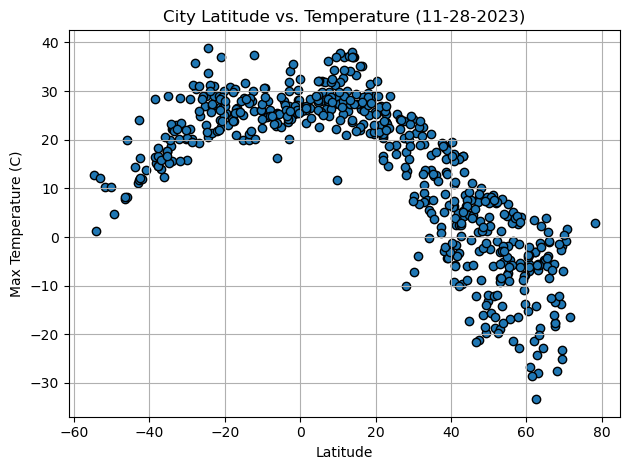

In [171]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True)
plt.tight_layout ()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

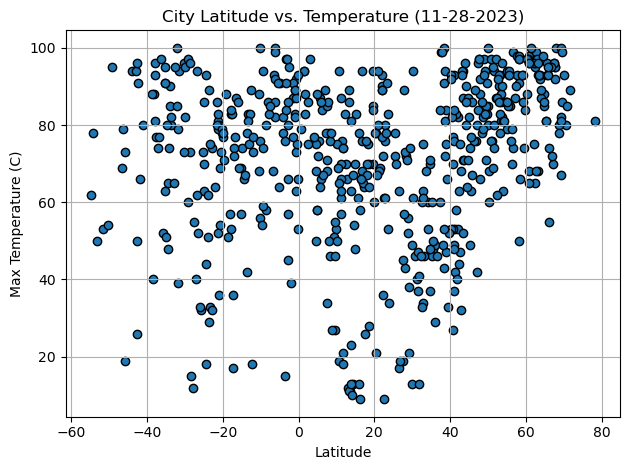

In [172]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

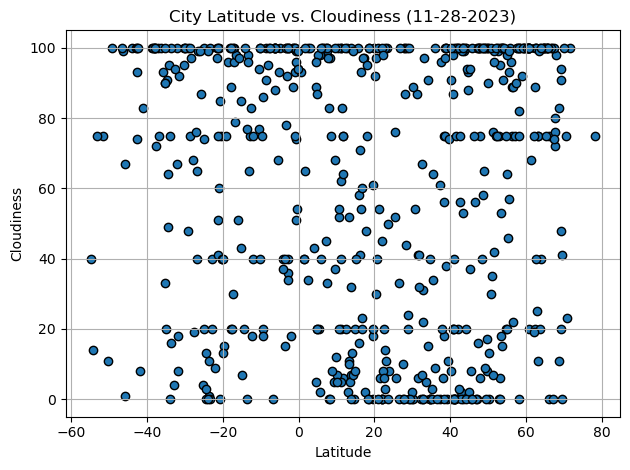

In [173]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k")
date= datetime.now()
date= date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

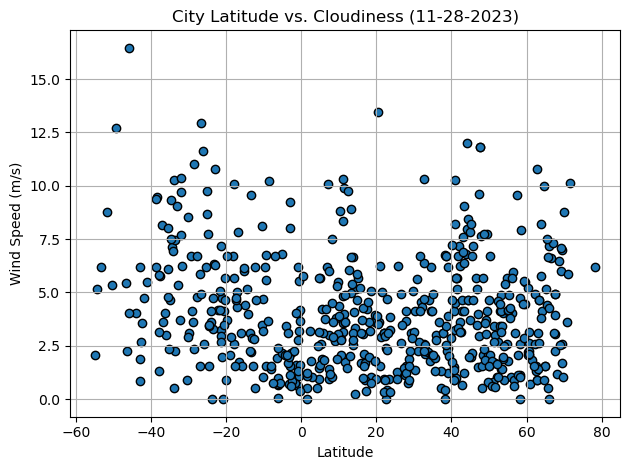

In [174]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [175]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#Since i am using different x and y values, I am going to write this as a hypothetica
#with a x for the x value and y for the y value
from scipy import stats
#pe_slope, pe_int, pe_r, pe_std,err = stats.linregress(x,y)
#pe_fit = pe_slope * x + pe_int




In [176]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-16.91,85,100,1.03,CA,1701183206
1,anadyr,64.7500,177.4833,-4.72,85,100,10.00,RU,1701183482
2,zaozersk,69.4005,32.4476,-1.89,82,94,7.00,RU,1701183482
5,bethel,41.3712,-73.4140,2.48,53,0,5.66,US,1701183483
6,yuzhno-kurilsk,44.0306,145.8556,6.32,96,100,7.96,RU,1701183483


In [177]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])<0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tolanaro,-25.0319,46.9987,29.04,70,20,9.77,MG,1701183482
4,tshikapa,-6.4167,20.8000,22.87,93,100,1.93,CD,1701183483
8,margaret river,-33.9500,115.0667,15.73,85,0,0.54,AU,1701183484
9,waitangi,-43.9535,-176.5597,14.34,94,100,4.02,NZ,1701183484
12,arraial do cabo,-22.9661,-42.0278,28.98,74,20,10.80,BR,1701183485


###  Temperature vs. Latitude Linear Regression Plot

The r-value is-0.8671522834892962


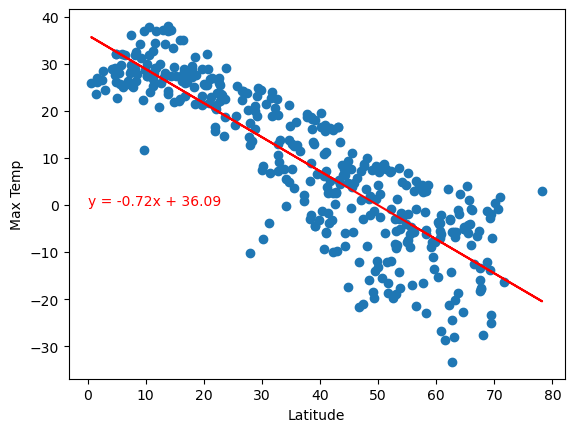

In [196]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(equation,(0,0),color="red")
print(f'The r-value is{rvalue}')



The r-value is0.6460634018623254


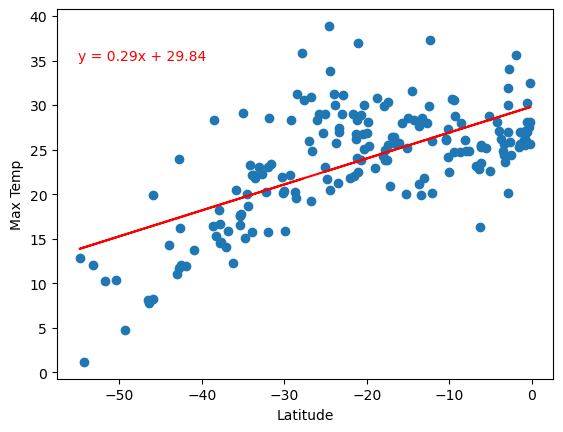

In [195]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(equation,(-55,35),color="red")
print(f'The r-value is{rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is0.41591657997883136


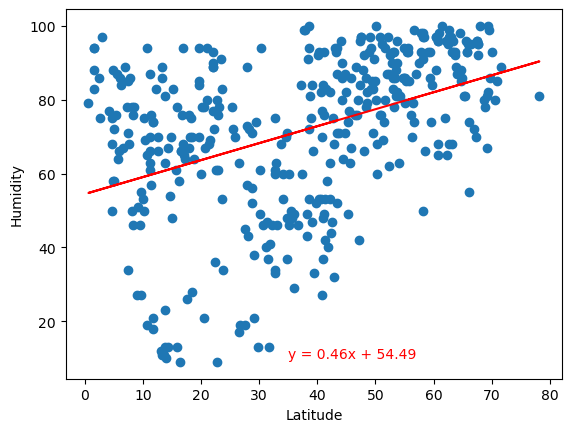

In [193]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(equation,(35,10),color="red")
print(f'The r-value is{rvalue}')

The r-value is0.10634410549506525


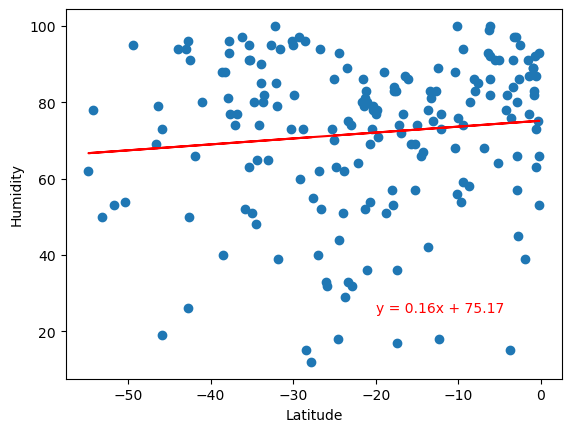

In [192]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(equation,(-20,25),color="red")
print(f'The r-value is{rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is0.2073295792487585


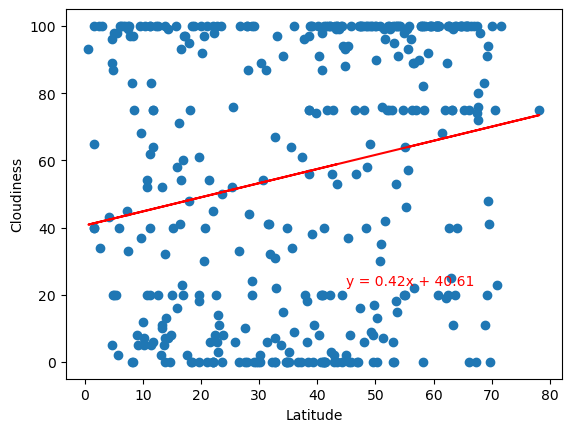

In [191]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(equation,(45,23),color="red")
print(f'The r-value is{rvalue}')

The r-value is0.06463343527229418


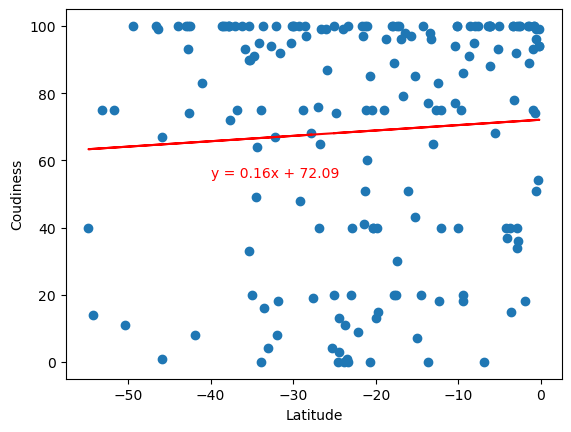

In [190]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Coudiness")
plt.xlabel("Latitude")
plt.annotate(equation,(-40,55),color="red")
print(f'The r-value is{rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is0.08090070721579828


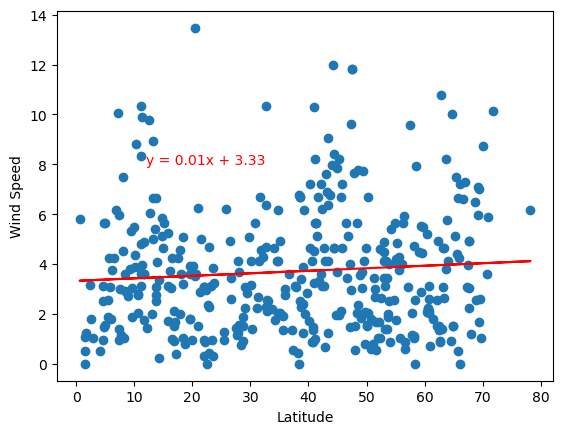

In [188]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(equation,(12,8),color="red")
print(f'The r-value is{rvalue}')

The r-value is-0.36561035214332765


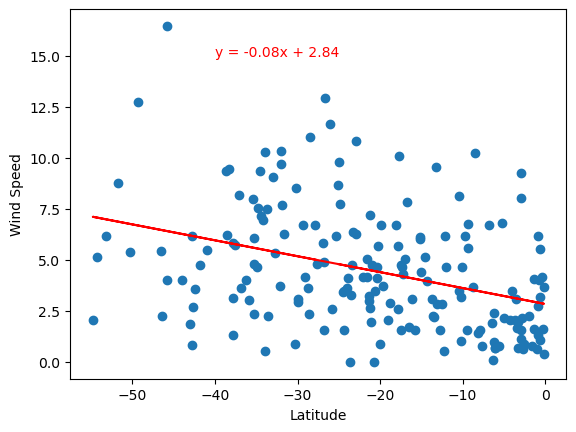

In [187]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
slope = linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg_val = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, reg_val, "-r")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(equation,(-40,15),color="red")
print(f'The r-value is{rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE